In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Loading in data

In [2]:
def getNumFromOneHot(inp):
    for i in range(10):
        if inp[i] == 1:
            return i

In [3]:
def draw_stroke_sequence(sequence, save_path=None, show=True):
    """
    sequence: numpy array or list of shape (T, 4) where each row is [dx, dy, eos, eod]
    save_path: optional path to save the plot as an image
    show: whether to display the plot
    """
    x, y = 0, 0
    xs, ys = [], []

    for dx, dy, eos, eod in sequence:
        x += dx*28
        y += dy*28
        xs.append(x)
        ys.append(y)

        if eos > 0.5:  # end of stroke
            xs.append(None)
            ys.append(None)

        if eod > 0.5:
            break

    plt.figure(figsize=(2, 2))
    plt.plot(xs, ys, linewidth=2)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.axis('equal')
    
    plt.show()

In [4]:
indexes = [0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 13, 14, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 37, 38, 39, 40, 44, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 65, 66, 68, 69, 70, 71, 74, 76, 79, 80, 81, 85, 86, 88, 89, 90, 91, 94, 98, 99, 100, 101, 102, 111, 112, 113, 116, 120, 123, 125, 126, 127, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 142, 143, 145, 148, 154, 156, 157, 161, 162, 165, 168, 169, 170, 171, 172, 173, 175, 176, 178, 180, 182, 183, 186, 187, 188, 189, 191, 192, 196, 197, 201, 202, 203, 204, 205, 213, 215, 217, 219, 223, 224, 225, 228, 230, 231, 234, 239, 240, 246, 250, 251, 252, 254, 255, 259, 260, 261, 263, 264, 265, 267, 270, 271, 272, 273, 274, 275, 276, 279, 280, 
           281, 283, 284, 286, 289, 291, 292, 294, 295, 296, 298, 302, 306, 309, 311, 312, 313, 316, 319, 321, 323, 329, 330, 331, 332, 333, 334, 335, 336, 339, 342, 345, 346, 347, 348, 351, 352, 353, 354, 356, 357, 361, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 383, 384, 388, 389, 392, 393, 397, 398, 401, 406, 407, 411, 413, 414, 416, 419, 422, 424, 426, 427, 430, 434, 440, 442, 444, 446, 455, 456, 459, 461, 463, 466, 469, 471, 472, 473, 478, 480, 481, 485, 487, 489, 491, 494, 496, 498, 501, 502, 505, 506, 507, 508, 509, 512, 517, 518, 521, 525, 528, 530, 531, 532, 534, 537, 540, 541, 545, 548,
           548, 556, 558, 564, 568, 574, 575, 576, 577, 585, 586, 587, 588, 589, 594, 598, 599, 600, 604, 607, 608, 609, 615, 616, 618, 619, 624, 626, 634, 645, 649, 651, 652, 656, 663, 665, 666, 667, 674, 677, 682, 683, 688, 705, 706, 710, 713, 715, 722, 724, 725, 727, 728, 729, 734, 739, 741, 745, 747, 749, 750, 751, 752, 754, 755, 757, 759, 760, 766, 767, 768, 769, 771, 772, 773, 774, 775, 778, 783, 788, 789, 790, 807, 809, 814, 820, 824, 826, 828, 833, 835, 837, 840, 843, 847, 849, 851, 853, 854, 857, 859, 860, 867, 869, 870, 871, 880, 884, 886, 887, 889, 890, 891, 897, 906, 907, 911, 917, 920, 927, 931, 940, 941, 944, 945, 946, 948, 954, 955, 963, 970, 972, 973, 974, 976, 978, 979, 982, 984, 985, 986, 997,
           5118, 5423, 5438, 5495, 5589]
# 606, 899, 5003, 5129, 5349, 5462

In [5]:
datas = [[] for _ in range(10)]

for i in indexes:
    try:
        data = np.loadtxt(f'../sequences/testimg-{i}-targetdata.txt', delimiter=' ')
    except FileNotFoundError:
        print(f"❌ File not found at path: {i}")
        continue
    
    inputOneshot = data[0, 0:10]
    outputStrokes = data[:, 10:]
    outputStrokes[:, 0] = outputStrokes[:, 0]/28
    outputStrokes[:, 1] = outputStrokes[:, 1]/28
    
    datas[getNumFromOneHot(inputOneshot)].append(outputStrokes)

❌ File not found at path: 0
❌ File not found at path: 1
❌ File not found at path: 2
❌ File not found at path: 3
❌ File not found at path: 4
❌ File not found at path: 5
❌ File not found at path: 6
❌ File not found at path: 9
❌ File not found at path: 10
❌ File not found at path: 11
❌ File not found at path: 13
❌ File not found at path: 14
❌ File not found at path: 19
❌ File not found at path: 20
❌ File not found at path: 21
❌ File not found at path: 22
❌ File not found at path: 23
❌ File not found at path: 26
❌ File not found at path: 27
❌ File not found at path: 28
❌ File not found at path: 29
❌ File not found at path: 30
❌ File not found at path: 31
❌ File not found at path: 37
❌ File not found at path: 38
❌ File not found at path: 39
❌ File not found at path: 40
❌ File not found at path: 44
❌ File not found at path: 46
❌ File not found at path: 48
❌ File not found at path: 49
❌ File not found at path: 51
❌ File not found at path: 52
❌ File not found at path: 53
❌ File not found at pa

In [155]:
amount = min([len(x) for x in datas])
amount

11

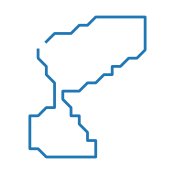

In [156]:
j = 1
# print(datas[8][j][0])
# draw_stroke_sequence(datas[8][j][1])

draw_stroke_sequence(datas[8][j])

In [157]:
input_data = []
output_data = []

for i in range(10):
    temp_onehot = np.zeros(10)
    temp_onehot[i] = 1
    
    smallest_10 = sorted(datas[i], key=len)[:amount]
    for k in smallest_10:
        input_data.append(temp_onehot)
        output_data.append(k)

In [158]:
# input_data = []
# output_data = []

# for i in range(10):
#     temp_onehot = np.zeros(10)
#     temp_onehot[i] = 1
    
#     for k in range(amount):
#         input_data.append(temp_onehot)
#         output_data.append(datas[i][k])

Data Processing

In [159]:
# Finding the max length of a sequence
max_length = 0
j = 0
for i in range(len(output_data)):
    if len(output_data[i]) > max_length:
        max_length = len(output_data[i])
    j += 1

print(max_length)
print(j)

61
110


In [160]:
print(len(output_data))

110


In [161]:
# Padding the sequences so that they are all the same size (good for batching)
padded_output_data = np.zeros( (len(output_data), max_length, 4) )

for i in range(len(output_data)):
    padded_output_data[i, :len(output_data[i]), :] = output_data[i]
    padded_output_data[i, len(output_data[i]):, :] = [0, 0, 0, 1]

In [162]:
padded_input_data = np.zeros( (len(output_data), max_length, 4) )

for i in range(len(output_data)):
    padded_input_data[i, 0, :] = [0, 0, 0, 0]
    padded_input_data[i, 1:, :] = padded_output_data[i, :max_length-1, :]

In [163]:
class StrokeDataset(Dataset):
    def __init__(self, onehot, inputs, outputstroke):
        self.digit = onehot                     # shape: [N]
        self.inputstroke = inputs               # list of [seq_len, 4] arrays
        self.outputstroke = outputstroke        # list of [seq_len, 4] arrays

    def __len__(self):
        return len(self.digit)

    def __getitem__(self, idx):
        digit = self.digit[idx]
        inputs = self.inputstroke[idx]
        outputs = self.outputstroke[idx]
        return torch.tensor(digit, dtype=torch.float32), torch.tensor(inputs, dtype=torch.float32), torch.tensor(outputs, dtype=torch.float32)

In [164]:
strokeDataset = StrokeDataset(input_data, padded_input_data, padded_output_data)

In [165]:
loader = DataLoader(strokeDataset, batch_size=32, shuffle=True)

Creating Model

Notes


RNN:
input_size = output_size 


In [166]:
class DigitToStrokeLSTM(nn.Module):
    def __init__(self, hidden_size=256, num_layers=2, batch_size=32):
        super(DigitToStrokeLSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.batch_size = batch_size
        
        self.embedding = nn.Linear(10, hidden_size)  # From one-hot to hidden dim
        
        # LSTM
        # Output layer: predicts [dx, dy, eos, eod]
        # Inital hidden state is the one-hot of number
        # Initial input is [0, 0, 0, 0, 0]
        # Input at t > 0 is output from t-1
        
        self.lstm = nn.LSTM(
            input_size=4,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Output layer: predicts [dx, dy, eos, eod]
        self.output_head = nn.Linear(hidden_size, 4)
        self.dropout = nn.Dropout(p=0.1)
        self.sigmoid = nn.Sigmoid()  # For eos/eod
        self.tanh = nn.Tanh()


    def forward(self, x, hidden=None, onehot_digit=None):
        
        if onehot_digit != None and hidden == None:
            # Embed the digit
            h0 = self.embedding(onehot_digit)
            h0 = h0.unsqueeze(0).repeat(self.num_layers, 1, 1)
            c0 = torch.zeros_like(h0)
            hidden = (h0, c0)

        elif hidden == None and onehot_digit == None:
            hidden = (torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
                      torch.zeros(self.num_layers, self.batch_size, self.hidden_size))
            
        out, hidden = self.lstm(x, hidden)
        out = self.dropout(out)
        
        out = self.output_head(out)
        
        out[:, :, 0:2] = self.tanh(out[:, :, 0:2])
        # out[:, :, 2:] = self.sigmoid(out[:, :, 2:])
        
        return out, hidden
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [167]:
# DAMAGE WEIGHTS

def damage_smallest(model, p_smallest): # energy constraint
    for name, param in model.named_parameters():
        if param.requires_grad and param.ndim >= 2:
            if p_smallest == 0:
                continue

            tensor = param.data
            weight_magnitudes = tensor.abs().view(-1)
            k = int(weight_magnitudes.numel() * p_smallest)

            if k == 0:
                continue
            threshold = weight_magnitudes.kthvalue(k).values.item()

            mask = tensor.abs() >= threshold
            param.data.mul_(mask)

def damage_fas(model,  p_block, p_reflect, p_filter):
    for name, param in model.named_parameters():
        if param.requires_grad and param.ndim >= 2:
            if p_block + p_reflect + p_filter == 0:
                continue

            tensor = param.data
            flat_weights = tensor.view(-1)
            nonzero_indices = (flat_weights!=0).nonzero(as_tuple=True)[0]
            num_nonzero_indices = nonzero_indices.numel()
            if num_nonzero_indices == 0:
                continue

            # percentage of weights damaged will be taken from the number of nonzero weights
            # simulated fas damage occurs after energy constraint blockage
            num_block = int(num_nonzero_indices * p_block)
            num_reflect = int(num_nonzero_indices * p_reflect)
            num_filter = int(num_nonzero_indices * p_filter)

            shuffled_indices = nonzero_indices[torch.randperm(num_nonzero_indices, device=flat_weights.device)]

            indices_block = shuffled_indices[:num_block]
            indices_reflect = shuffled_indices[num_block:num_block+num_reflect]
            indices_filter = shuffled_indices[num_block+num_reflect:num_block+num_reflect+num_filter]

            # do damage
            # blockage: set weights to 0
            if p_block != 0:
                flat_weights[indices_block] = 0

            # reflect: halve weights
            if p_reflect != 0:
                flat_weights[indices_reflect] *= 0.5

            # filter: low pass filter (lusch et al)
            if p_filter != 0:
                weights_to_filter = flat_weights[indices_filter]            # get weights before transformation
                signs = torch.sign(weights_to_filter)                       # get signs of weights
                abs_weights_to_filter = weights_to_filter.abs()             # get high_weight, should be in the 95th percentile for all weights
                high_weight = torch.quantile(flat_weights.abs(), 0.95)      # scale weights to mostly between -1 and 1
                x = abs_weights_to_filter / high_weight
                transformed_weights = -0.2744 * x**2 + 0.9094 * x - 0.0192
                gaussian_noise = torch.randn_like(transformed_weights) * 0.05
                transformed_weights += gaussian_noise
                transformed_weights = transformed_weights * signs * high_weight # rescale
                flat_weights[indices_filter] = transformed_weights


In [168]:
model = DigitToStrokeLSTM(hidden_size = 512, num_layers=2).to(device)

# # damage weights to simulate energy constraint and lesioning
# damage_smallest(model, 0.0)
# damage_fas(model, 0.0, 0.0, 0.0)

dx_dy_loss_fn = nn.MSELoss()
eos_eod_loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [182]:
n_epochs = 2500

best_val_loss = 9999
patience = 10
counter = 0

for epoch in range(n_epochs):
    model.train()
    total_loss = 0

    for (dig, input_seq, output_seq) in loader:
        # stroke_seq: [batch, seq_len, 4]
        input_seq = input_seq.to(device)
        target_seq = output_seq.to(device)
        dig = dig.to(device)

        pred_seq, hidden = model(input_seq, onehot_digit = dig)  # [batch, seq_len-1, 4]

        # Separate predictions
        pred_dxdy = pred_seq[..., :2]         # [batch, seq_len-1, 2]
        pred_eos_eod = pred_seq[..., 2:]      # [batch, seq_len-1, 2]

        # Separate targets
        target_dxdy = target_seq[..., :2]
        target_eos_eod = target_seq[..., 2:]

        # Compute losses
        loss_dxdy = dx_dy_loss_fn(pred_dxdy, target_dxdy)
        loss_eos_eod = eos_eod_loss_fn(pred_eos_eod, target_eos_eod)

        loss = loss_dxdy + loss_eos_eod

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        
    # if total_loss < best_val_loss:
    #     best_val_loss = total_loss
    #     counter = 0
    # else:
    #     counter += 1
    #     if counter >= patience:
    #         print("Early stopping triggered")
    #         break

    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f}")

Epoch 1 | Loss: 0.0030
Epoch 2 | Loss: 0.0023
Epoch 3 | Loss: 0.0027
Epoch 4 | Loss: 0.0027
Epoch 5 | Loss: 0.0036
Epoch 6 | Loss: 0.0032
Epoch 7 | Loss: 0.0029
Epoch 8 | Loss: 0.0022
Epoch 9 | Loss: 0.0020
Epoch 10 | Loss: 0.0024
Epoch 11 | Loss: 0.0022
Epoch 12 | Loss: 0.0023
Epoch 13 | Loss: 0.0030
Epoch 14 | Loss: 0.0027
Epoch 15 | Loss: 0.0022
Epoch 16 | Loss: 0.0030
Epoch 17 | Loss: 0.0020
Epoch 18 | Loss: 0.0055
Epoch 19 | Loss: 0.0054
Epoch 20 | Loss: 0.0042
Epoch 21 | Loss: 0.0033
Epoch 22 | Loss: 0.0033
Epoch 23 | Loss: 0.0042
Epoch 24 | Loss: 0.0042
Epoch 25 | Loss: 0.0025
Epoch 26 | Loss: 0.0034
Epoch 27 | Loss: 0.0029
Epoch 28 | Loss: 0.0039
Epoch 29 | Loss: 0.0040
Epoch 30 | Loss: 0.0045
Epoch 31 | Loss: 0.0037
Epoch 32 | Loss: 0.0045
Epoch 33 | Loss: 0.0069
Epoch 34 | Loss: 0.0098
Epoch 35 | Loss: 0.0177
Epoch 36 | Loss: 0.0193
Epoch 37 | Loss: 0.0149
Epoch 38 | Loss: 0.0269
Epoch 39 | Loss: 0.0210
Epoch 40 | Loss: 0.0455
Epoch 41 | Loss: 0.0515
Epoch 42 | Loss: 0.0600
E

In [183]:
def generate_text(number):
    model.eval()
    
    temp_onehot = np.zeros(10)
    temp_onehot[number] = 1
    temp_onehot = torch.tensor(temp_onehot, dtype=torch.float32).to(device)
    
    initial_input = torch.tensor([0, 0, 0, 0], dtype=torch.float32).to(device).unsqueeze(0).unsqueeze(1)
    
    outputs = []
    
    output, hidden = model(initial_input, onehot_digit=temp_onehot)
    output[..., 2:] = (torch.sigmoid(output[..., -1, 2:]) > 0.5).float()

    outputs.append(output[:, -1, :].detach().cpu().numpy()[0])

    for i in range(max_length-1):
        output, hidden = model(output, hidden=hidden)
        output[..., 2:] = (torch.sigmoid(output[..., -1, 2:]) > 0.5).float()
        outputs.append(output[:, -1, :].detach().cpu().numpy()[0])
        
        # print(outputs[-1])
        if output[:, -1, 3] == 1:
            # print("HI")
            break
    
    draw_stroke_sequence(outputs)


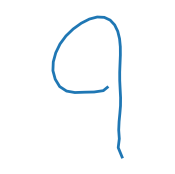

In [204]:
generate_text(9)

In [207]:
# Save model if good
torch.save(model.state_dict(), 'model_weights/sketch_model_weights1.pth')

In [23]:
model = DigitToStrokeLSTM().to(device) # create a new instance
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()  # set to evaluation mode if you're doing inference

RuntimeError: Error(s) in loading state_dict for DigitToStrokeLSTM:
	size mismatch for embedding.weight: copying a param with shape torch.Size([512, 10]) from checkpoint, the shape in current model is torch.Size([256, 10]).
	size mismatch for embedding.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for lstm.weight_ih_l0: copying a param with shape torch.Size([2048, 4]) from checkpoint, the shape in current model is torch.Size([1024, 4]).
	size mismatch for lstm.weight_hh_l0: copying a param with shape torch.Size([2048, 512]) from checkpoint, the shape in current model is torch.Size([1024, 256]).
	size mismatch for lstm.bias_ih_l0: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for lstm.bias_hh_l0: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for lstm.weight_ih_l1: copying a param with shape torch.Size([2048, 512]) from checkpoint, the shape in current model is torch.Size([1024, 256]).
	size mismatch for lstm.weight_hh_l1: copying a param with shape torch.Size([2048, 512]) from checkpoint, the shape in current model is torch.Size([1024, 256]).
	size mismatch for lstm.bias_ih_l1: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for lstm.bias_hh_l1: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for output_head.weight: copying a param with shape torch.Size([4, 512]) from checkpoint, the shape in current model is torch.Size([4, 256]).

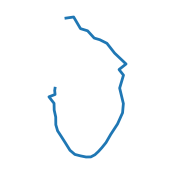

In [30]:
generate_text(0)

In [ ]:
# shit: 0, 5, 6, 8, 9